
K-Means Customer Segmentation Analysis


In [58]:
#1.อ่านไฟล์
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import warnings
import pandas as pd
df = pd.read_csv('Customers.csv')
print(df)

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [59]:
#2.แสดงผล 10 บรรทัดแรก
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [60]:
#3.ตรวจสอบ missing values,หาค่าสถิติพื้นฐาน
# df[df.isnull().any(axis=1)].head()
df.isnull().head()
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Genre'>

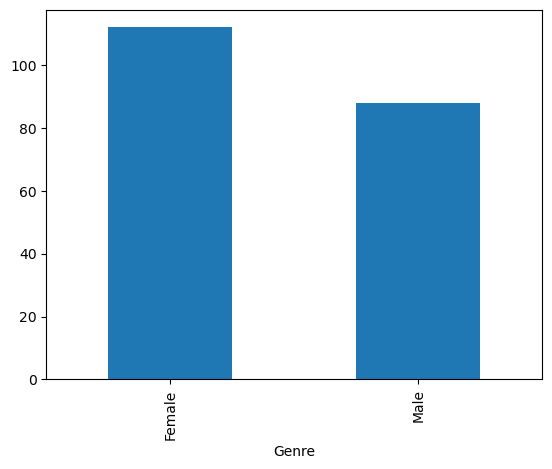

In [61]:
#4.ดูการแจกแจง โดยแสดงกราฟแท่งของลูกค้าแยกตามเพศ มีตัวอย่างคำสั่งในการ plot หลายรูปแบบ
df.groupby(['Genre'])['Genre'].count().plot(kind='bar')

(array([31., 19., 34., 29., 16., 26., 15., 10.,  6., 14.]),
 array([18. , 23.2, 28.4, 33.6, 38.8, 44. , 49.2, 54.4, 59.6, 64.8, 70. ]),
 <BarContainer object of 10 artists>)

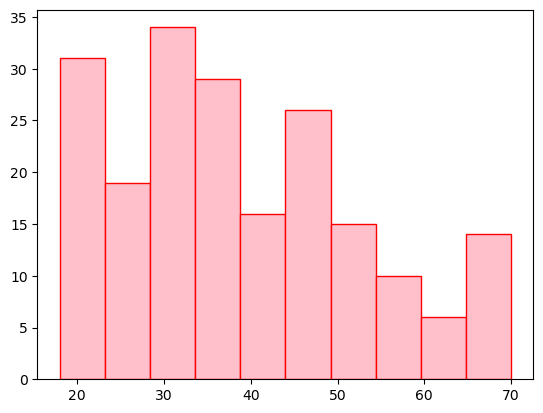

In [62]:
#5.สร้าง histogram,pie ของอายุ แบ่งเป็น 10 bin
plt.hist(df['Age'], bins = 10, color = 'pink',edgecolor='red')

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

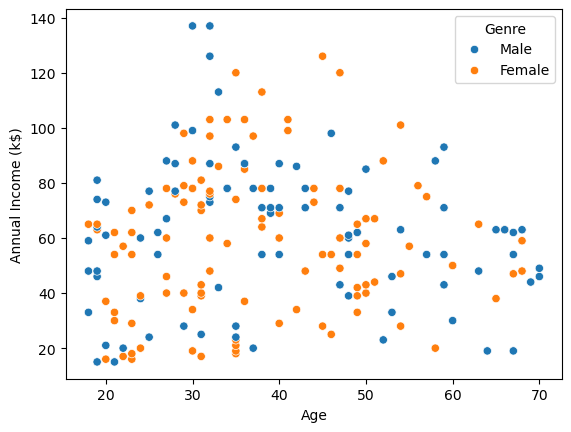

In [63]:
#6.ทำ scatter plot,pie ของข้อมูล Age, Income แยกตามเพศ
sns.scatterplot(x=df['Age'],y=df['Annual Income (k$)'],hue=df['Genre'])

C:\Users\Guest-Student\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Guest-Student\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Guest-Student\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Guest-Student\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known

1 176108.78
2 87159.30436535942
3 59492.737994932715
4 39542.34967265402
5 31725.826086956524
6 25416.402458647437
7 22245.9332429944
8 19547.112713486902
9 16619.35325427261


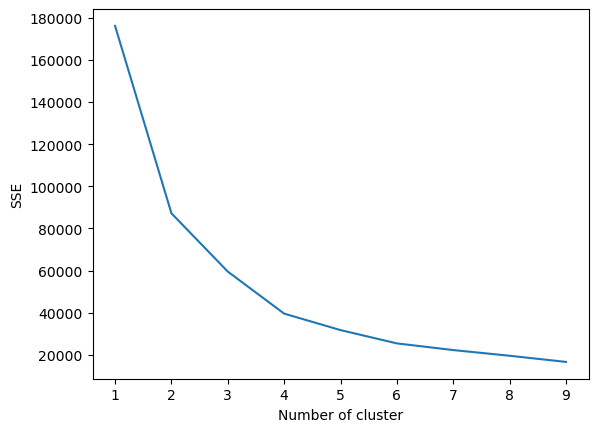

In [66]:
#7.นำ ข้อมูล Age, Income มาทำ clustering พิจารณาค่า K ที่ดีที่สุดเพื่อนำไปทำ K-Mean clustering
sse = {}
for k in range(1, 10):
    k_means = KMeans(n_clusters= k, init = 'random', max_iter=300)
    k_means.fit(df[['Age', 'Annual Income (k$)']])
    sse[k] = k_means.inertia_
    print(k, sse[k])
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [1]:
#8.ได้ค่า k= ? ในการจัดกลุ่มโดยวิธี K-Means
k = 4
k_means = KMeans(n_clusters=k, init='random', max_iter=300)
k_means.fit(df[['Age', 'Annual Income (k$)']])

NameError: name 'KMeans' is not defined

[[ 39.         106.5       ]
 [ 55.66071429  51.01785714]
 [ 29.44680851  29.21276596]
 [ 31.95890411  72.95890411]]


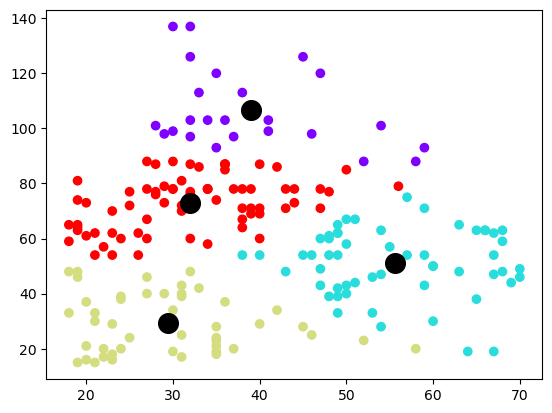

In [88]:
#9.ทำ scatter plot ที่แสดง centroid
cluster = k_means.predict(df[['Age', 'Annual Income (k$)']])
label = k_means.labels_
plt.scatter(df['Age'], df['Annual Income (k$)'], c=label, marker="o",cmap='rainbow')
center = k_means.cluster_centers_
print(center)
plt.scatter(center[:, 0], center[:, 1], c='black', s=200)